In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path="C:/Users/Alind/Quantum_ML_on_Liver_Dataset/ILPD.csv"
df=pd.read_csv(file_path)
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()
print("\n data size:",df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB

 data size: 6413


# Exploratary Data Analysis

In [7]:
categorical_val = []
continous_val = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [4]:
from sklearn.preprocessing import LabelEncoder
df['Gender']= LabelEncoder().fit_transform(df['Gender'])
print(df.isna().sum())

#filling na value with mean value
df['A/G Ratio'].fillna(value=df['A/G Ratio'].mean(), inplace=True)
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64


Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64

[]

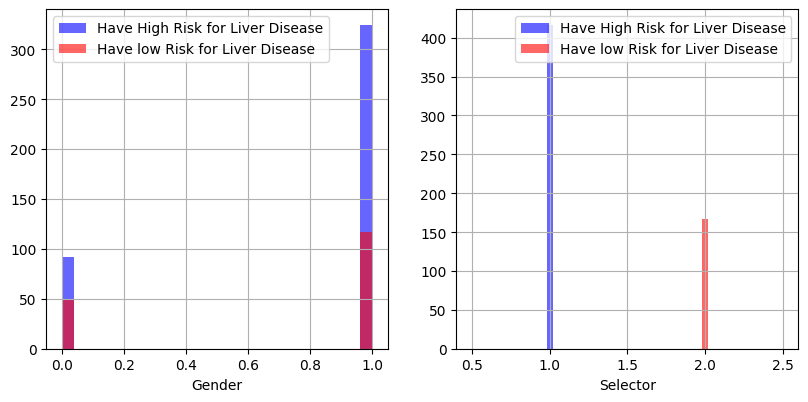

In [9]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Selector"] == 1][column].hist(bins=25, color='blue', label='Have High Risk for Liver Disease', alpha=0.6)
    df[df["Selector"] == 2][column].hist(bins=25, color='red', label="Have low Risk for Liver Disease", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

[]

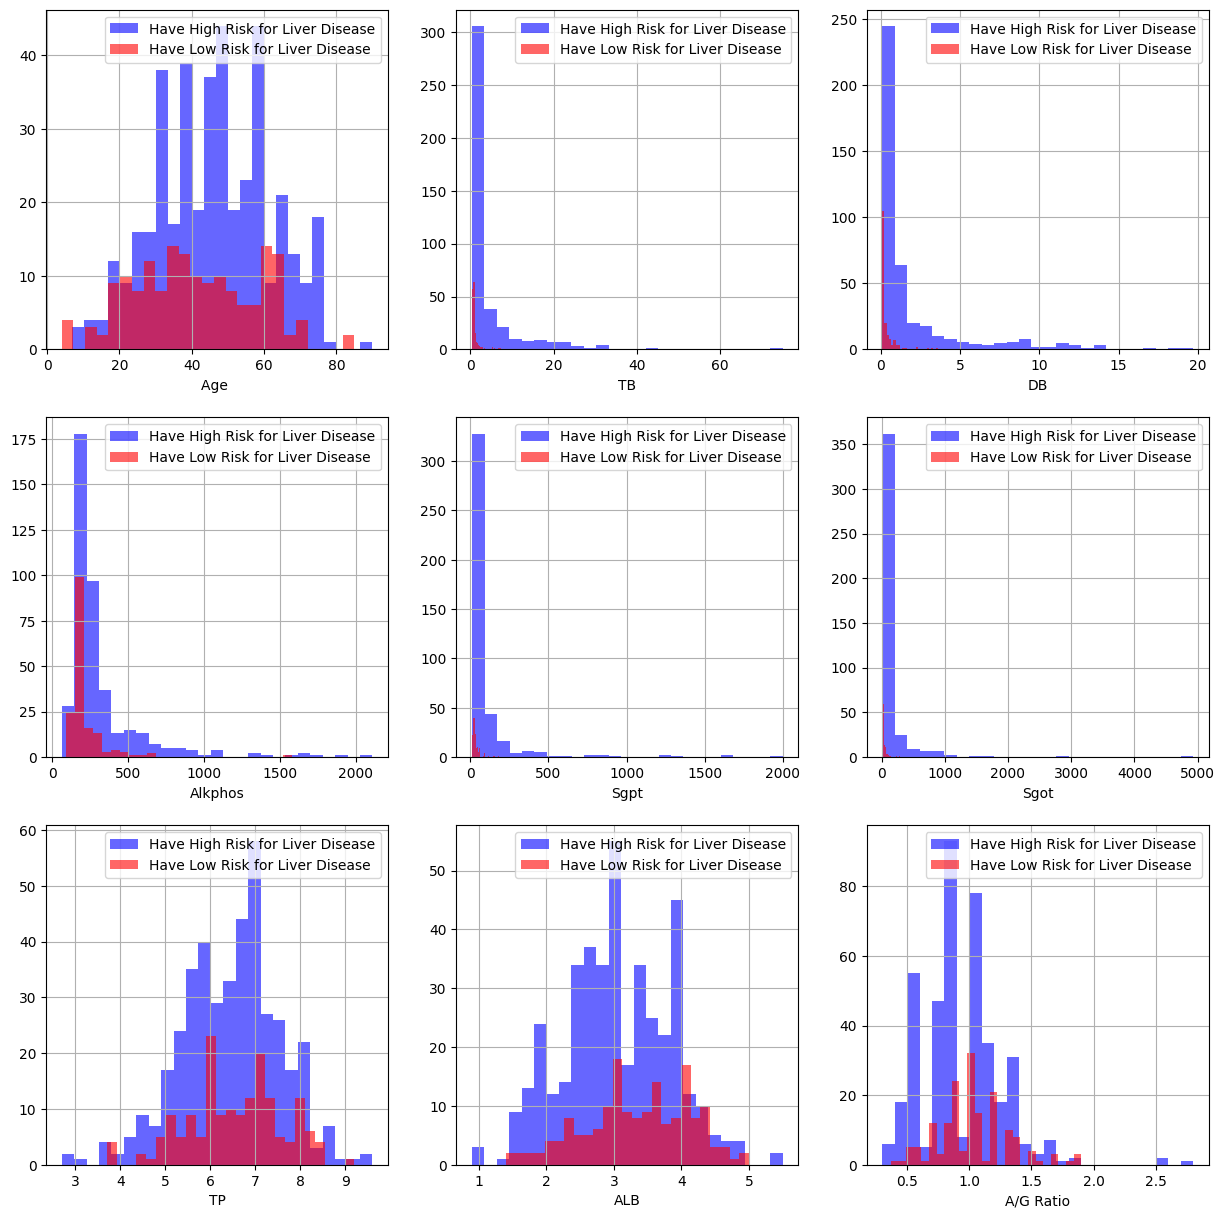

In [10]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["Selector"] == 1][column].hist(bins=25, color='blue', label='Have High Risk for Liver Disease', alpha=0.6)
    df[df["Selector"] == 2][column].hist(bins=25, color='red', label="Have Low Risk for Liver Disease", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

In [11]:
df.corr()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
TB,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
DB,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkphos,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Sgpt,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Sgot,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
TP,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
ALB,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
A/G Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


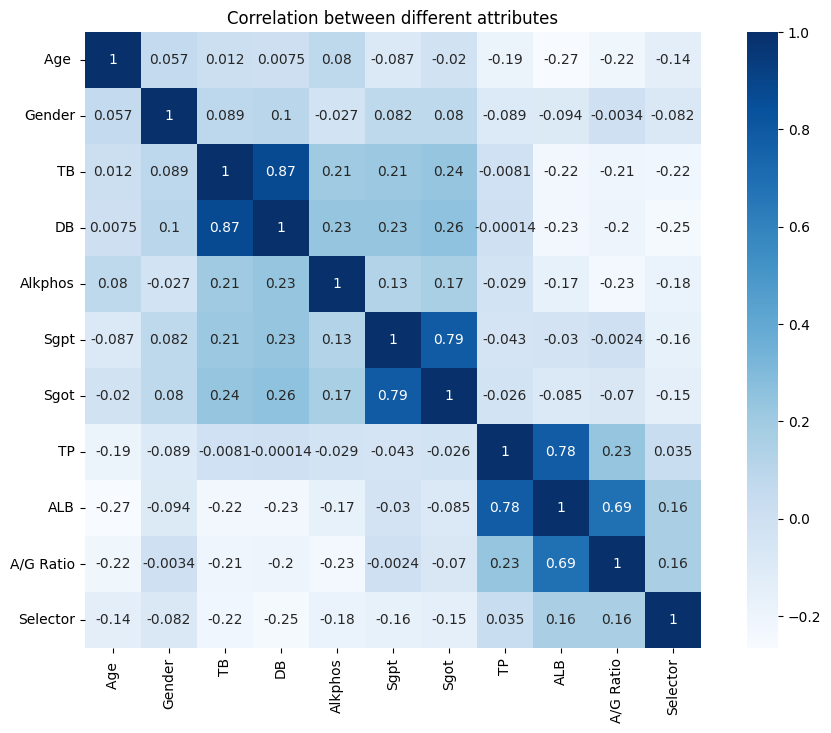

In [12]:
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["Selector"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Age          0.137351
Gender       0.082416
TB           0.220208
DB           0.246046
Alkphos      0.184866
Sgpt         0.163416
Sgot         0.151934
TP           0.035008
ALB          0.161388
A/G Ratio    0.162319
Selector     1.000000
Name: Selector, dtype: float64

## Principal Components Analysis

In [5]:
#Import Necessary libraries
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
Y = df['Selector'].values
X = df.drop(['Selector'], axis=1).values
# standardize features

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(437, 10) (146, 10) (437,) (146,)


In [7]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
print(pca.n_components_)

7


In [9]:
X_test_pca = pca.transform(X_test_scaled)


In [10]:
print("Shape of X-train after PCA", X_train_pca.shape)
print("Shape of X-test after PCA", X_test_pca.shape)

Shape of X-train after PCA (437, 7)
Shape of X-test after PCA (146, 7)


In [13]:
#saving the file
np.savetxt("feature_pca_train.csv", X_train_pca, delimiter=",")
np.savetxt("feature_pca_test.csv", X_test_pca, delimiter=",")

# SMOTE stands for Synthetic Minority Over-sampling Technique.
The function first checks the number of dimensions of the feature space, the number of instances in each class, and the label of the minority class. It then splits the data into minority and majority classes.

For each minority class instance, the function finds its K nearest neighbors using the knearest() function from the smotefamily library. It then randomly selects one of these neighbors and generates a new synthetic instance by interpolating between the selected neighbor and the original minority class instance. The interpolation factor is randomly chosen between 0 and 1.

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train_pca, Y_train)
X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(X_resampled, Y_resampled, test_size=0.25, random_state=42)

In [24]:
print("Original dataset size: ", X.shape, Y.shape)
print("Resampled dataset size: ", X_resampled.shape, Y_resampled.shape)

Original dataset size:  (583, 10) (583,)
Resampled dataset size:  (622, 7) (622,)


In [25]:
print("Shape of X-train after Resampling", X_train_resampled.shape)
print("Shape of X-test after Resampling", X_test_resampled.shape)

Shape of X-train after Resampling (466, 7)
Shape of X-test after Resampling (156, 7)


In [26]:
#saving the file
np.savetxt("feature_smote_train.csv", X_train_resampled, delimiter=",")
np.savetxt("feature_smote_test.csv", X_test_resampled, delimiter=",")
np.savetxt("label_smote_train.csv", Y_train_resampled, delimiter=",")
np.savetxt("label_smote_test.csv", Y_test_resampled, delimiter=",")